<a href="https://colab.research.google.com/github/suhaaskarthik/research-work/blob/main/information_criteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coded out approach to find optimal number of clusters using information-theoretic approach


Opening the file and filtering out the main attributes

In [ ]:
import pandas as pd
import math
FILEPATH = 'drive/MyDrive/dataset (1).csv'
df = pd.read_csv(FILEPATH)
print(df.columns)
df = df[['Timestamp', 'Track Number', 'lat_long_wgs84.lat', 'lat_long_wgs84.longitude', 'cartesian_pos.pos_x', 'cartesian_pos.pos_y', 'speed',
'geo_alt']]

Index(['Timestamp', 'Track Number', 'CTN', 'msg_hrd.source_agency',
       'originating_node_id', 'time_of_track_information',
       'lat_long_wgs84.lat', 'lat_long_wgs84.longitude', 'cartesian_pos.pos_x',
       'cartesian_pos.pos_y', 'course', 'speed', 'acceleration_flag',
       'acceleration', 'rocd_flag', 'rate_of_climb_descent', 'turn_dir_flag',
       'turn_direction', 'turn_rate_flag', 'turn_rate',
       'cartesian_trk_pos_accu_flag', 'cartesian_trk_xpos_accu',
       'cartesian_trk_ypos_accu', 'cartesian_trk_vel_accu_flag',
       'cartesian_trk_xvel_accu', 'cartesian_trk_yvel_accu', 'identification',
       'idn_category', 'idn_type', 'idn_mechanism', 'track_status',
       'fp_correlated_status', 'fp_ref_no', 'etd_date.day', 'etd_date.month',
       'etd_date.year', 'geo_alt_flag', 'geo_alt', 'baro_alt_flag', 'baro_alt',
       'grp_no_flag', 'grp_no', 'call_sign_flag', 'call_sign',
       'element_call_sign_flag', 'element_call_sign', 'pkg_call_sign_flag',
       'pkg_cal

In [ ]:
timestamp = df['Timestamp']

Converting to float datatype and create a heading field from coordinates

In [ ]:
df['cartesian_pos.pos_y'] = df['cartesian_pos.pos_y'].astype(float)
df['cartesian_pos.pos_x'] = df['cartesian_pos.pos_x'].astype(float)

#heading field is just pi/2 - tan-1(y/x) where y and x are the coordinates, as we measure from the north direction(+ve x-axis)
df['vector'] = df['cartesian_pos.pos_y']/df['cartesian_pos.pos_x']
for i in range(len(df['vector'])):
  df['vector'][i] = ((math.pi)/2 -(math.atan(df['vector'][i])))

Renaming and styling the dataset

In [ ]:
df.rename(columns = {'Track Number':'track_no', 'lat_long_wgs84.longitude':'long','lat_long_wgs84.lat':'lat', 'geo_alt': 'alt'}, inplace = True)
df

,Timestamp,track_no,lat,long,cartesian_pos.pos_x,cartesian_pos.pos_y,speed,alt,vector
0,1.644830e+12,1,22.495057,71.775152,-636325.0,1049033.0,277.77777,10000,2.596347
1,1.644830e+12,2,22.486019,71.802596,-633270.0,1048027.0,277.77777,10000,2.598054
2,1.644830e+12,3,22.469516,71.765430,-637407.0,1046190.0,277.77777,10000,2.594388
3,1.644830e+12,4,22.460480,71.792870,-634353.0,1045184.0,277.77777,10000,2.596094
4,1.644830e+12,5,22.443975,71.755712,-638489.0,1043346.0,277.77777,10000,2.592423
...,...,...,...,...,...,...,...,...,...
3138,1.644830e+12,1,24.431480,72.518234,-553606.0,1264593.0,277.77777,10000,2.728952
3139,1.644830e+12,4,24.396912,72.535759,-551655.0,1260745.0,277.77777,10000,2.729130
3140,1.644830e+12,6,24.371379,72.525894,-552753.0,1257903.0,277.77777,10000,2.727568
3141,1.644830e+12,3,24.405946,72.508370,-554704.0,1261751.0,277.77777,10000,2.727396


Removing columns as we've already used them for our calculations

In [ ]:
df = df.drop(columns = ['cartesian_pos.pos_x', 'cartesian_pos.pos_y'])

Standardising each of the fields (with z-score) and filtering the fields that are more dispersed

In [ ]:
from scipy.stats import zscore
columns = ['Timestamp', 'lat', 'long', 'speed', 'alt', 'vector']
for i in columns:
    df[[i]] = df[[i]].apply(zscore)

In [ ]:
#new_col filters out ony the fields with the dispersed values(i.e. fields that do not have the same value throughout), here we take values that have non NA values
new_col = []
for i in columns:
    if (not df[[i]].isna().any().any()):
      new_col.append(i)

In [ ]:
new_col

['lat', 'long', 'vector']

\Finding out the number of clusters using silhouette score for each time stamp

In [ ]:
df[new_col]

,lat,long,vector
0,-1.664110,-1.728857,-1.755953
1,-1.680264,-1.601241,-1.711519
2,-1.709762,-1.774063,-1.806938
3,-1.725914,-1.646467,-1.762556
4,-1.755415,-1.819254,-1.858090
...,...,...,...
3138,1.797163,1.726486,1.695721
3139,1.735374,1.807976,1.700338
3140,1.689735,1.762103,1.659698
3141,1.751522,1.680615,1.655201


## Silhouette score


1644830000000.0


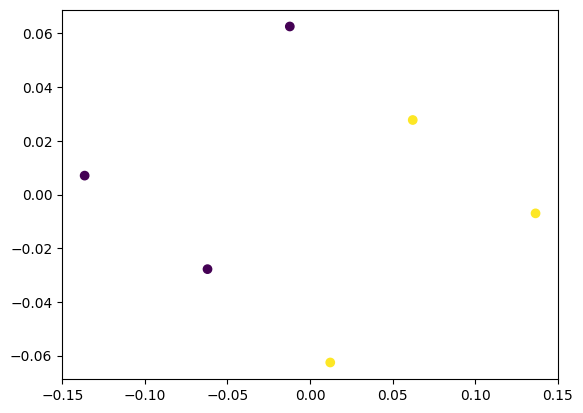

1644830000000.0


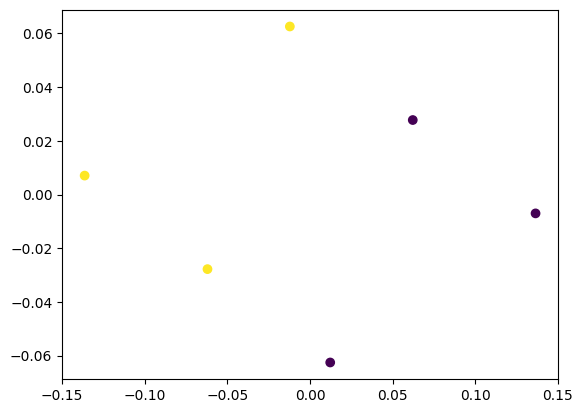

1644830000000.0


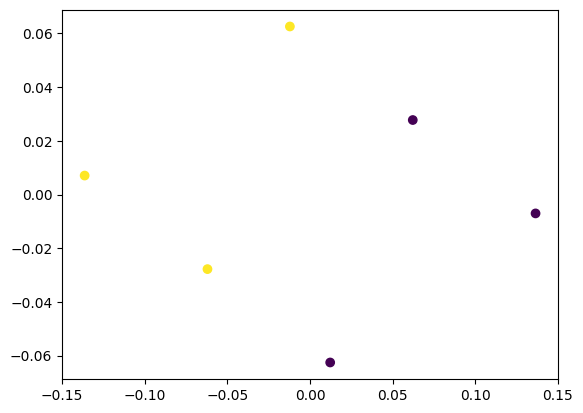

1644830000000.0


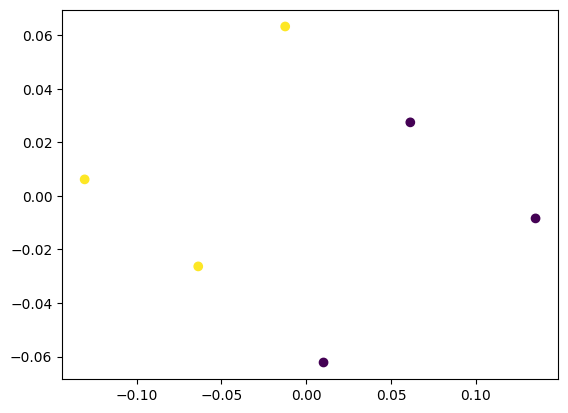

1644830000000.0


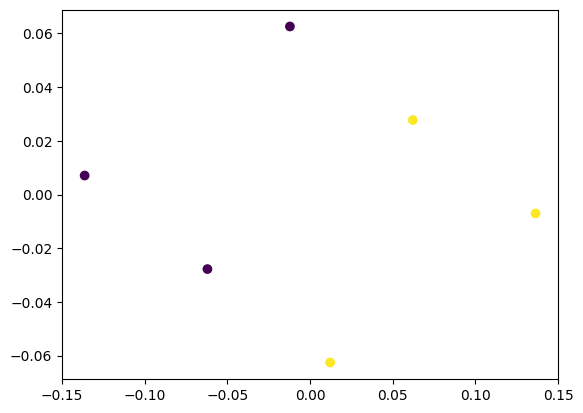

1644830000000.0


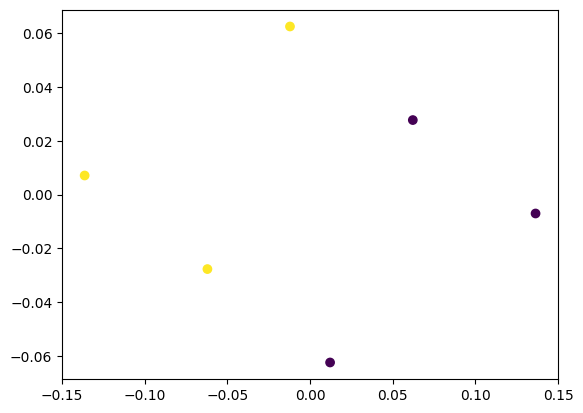

1644830000000.0


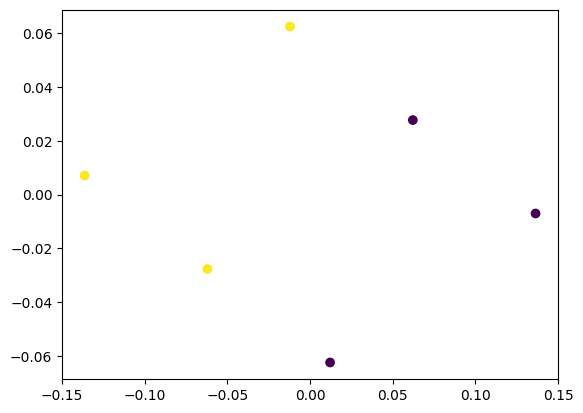

1644830000000.0


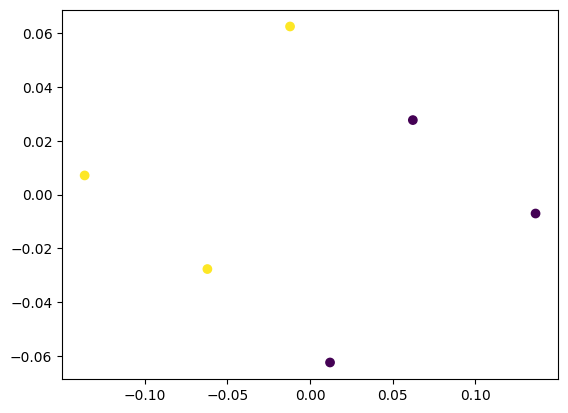

1644830000000.0


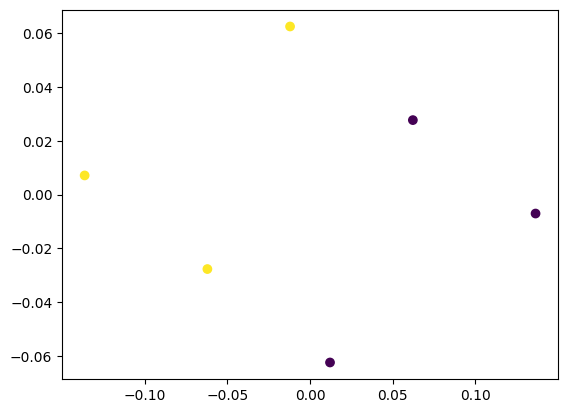

1644830000000.0


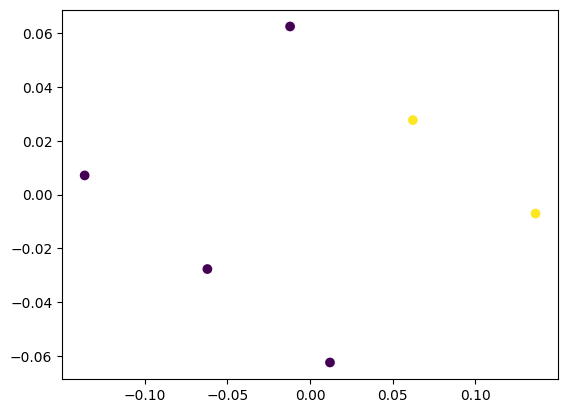

1644830000000.0


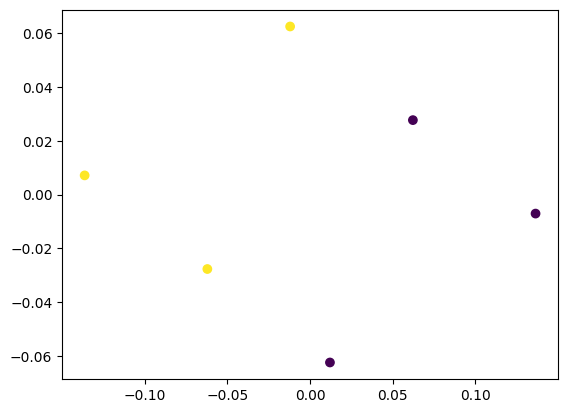

1644830000000.0


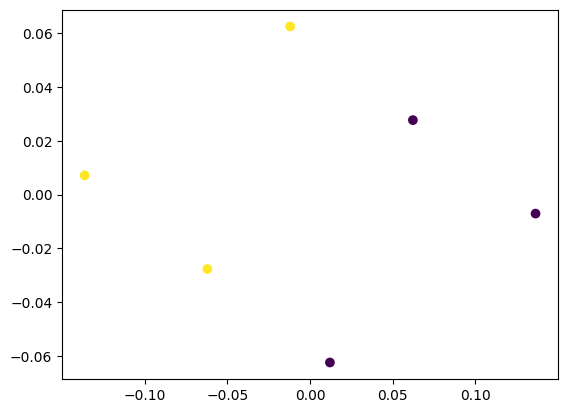

1644830000000.0


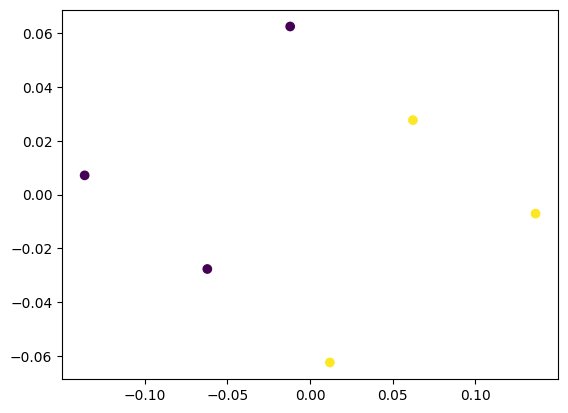

1644830000000.0


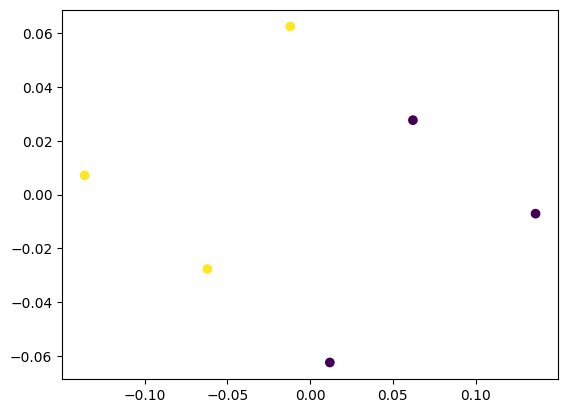

1644830000000.0


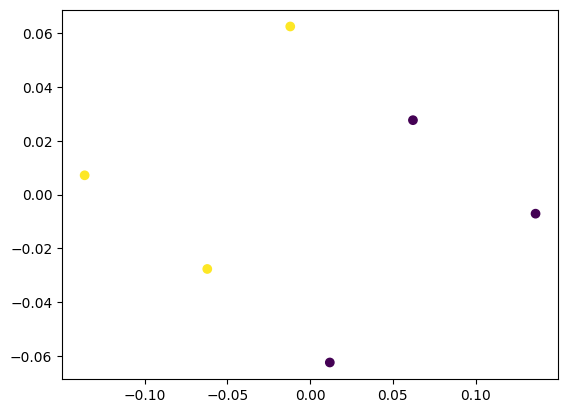

1644830000000.0


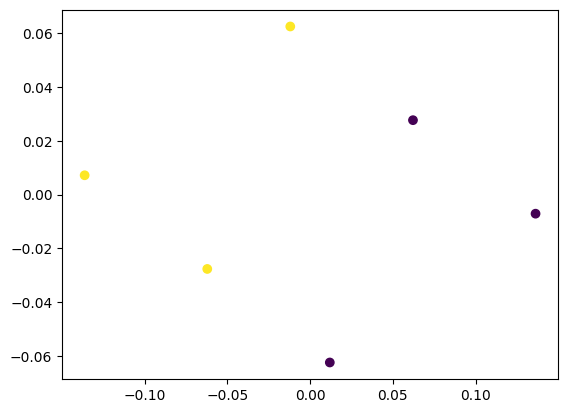

1644830000000.0


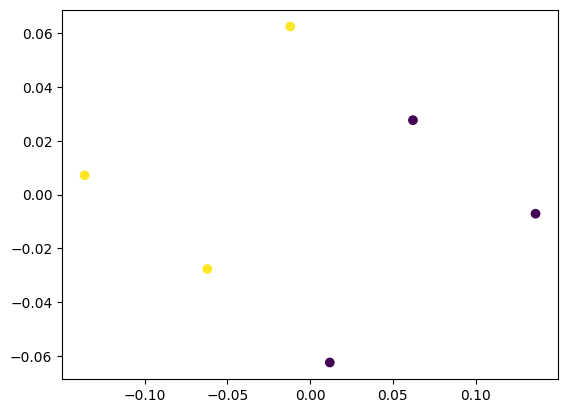

1644830000000.0


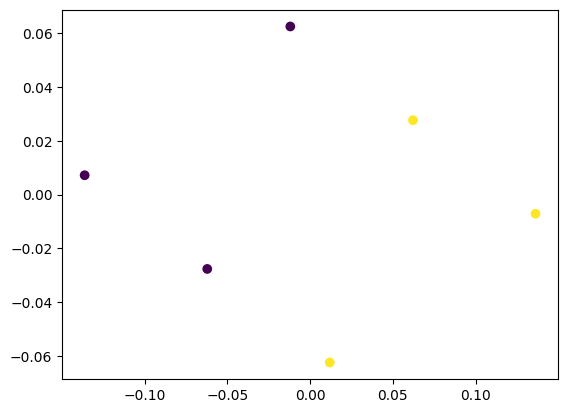

1644830000000.0


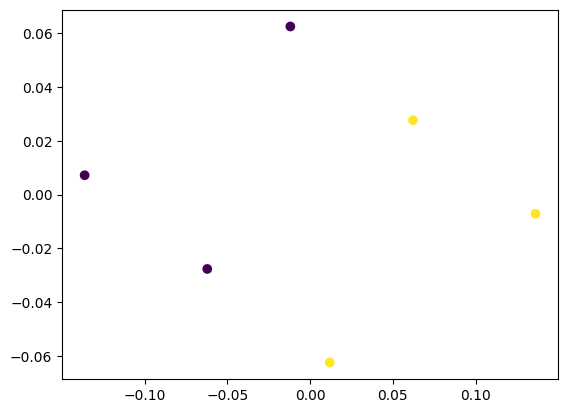

1644830000000.0


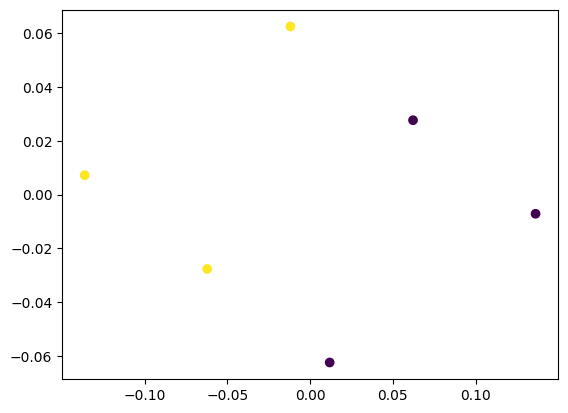

1644830000000.0


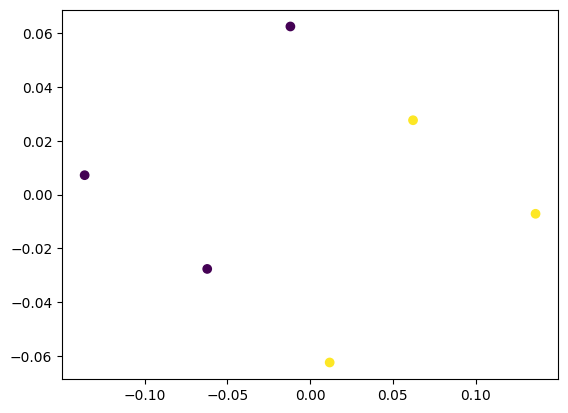

1644830000000.0


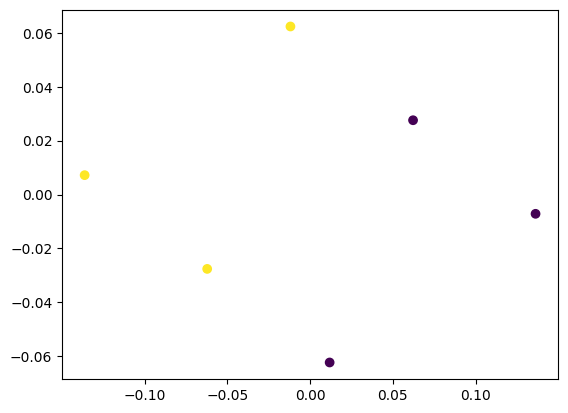

1644830000000.0


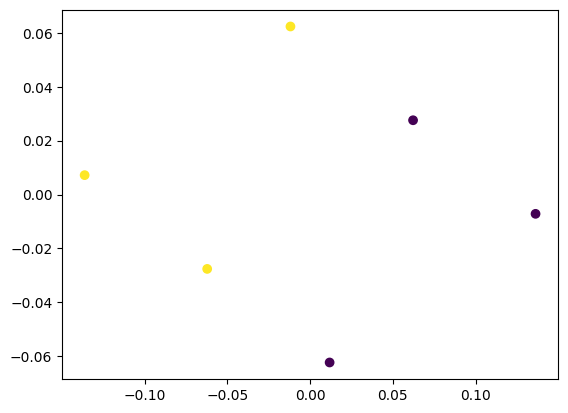

1644830000000.0


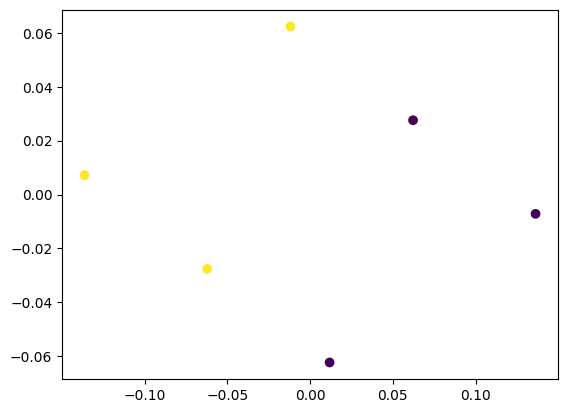

1644830000000.0


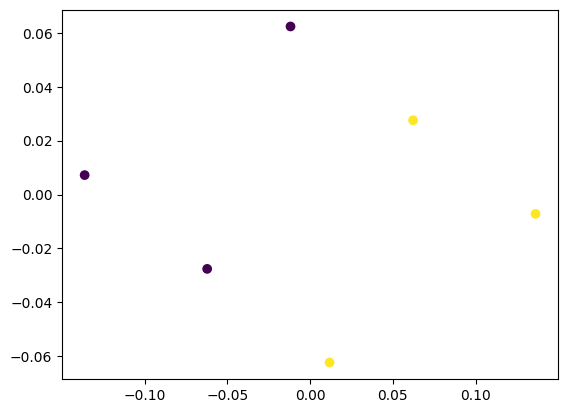

1644830000000.0


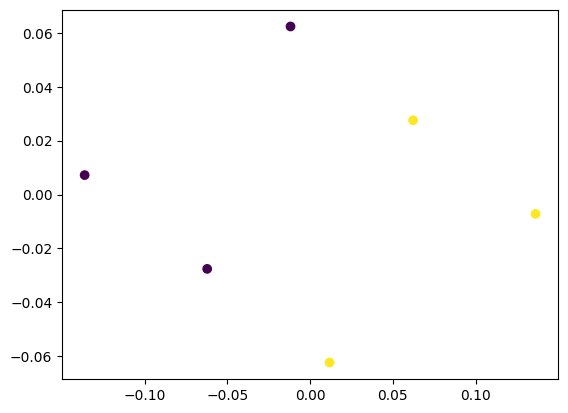

1644830000000.0


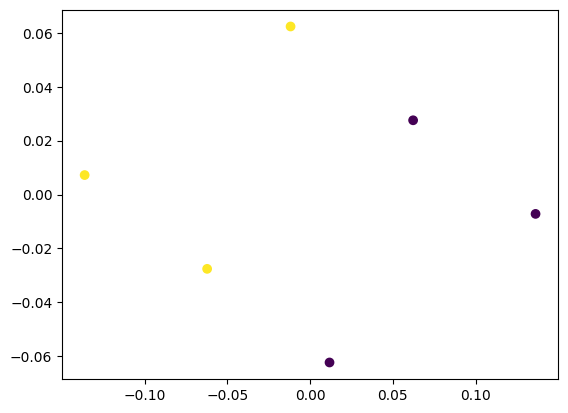

1644830000000.0


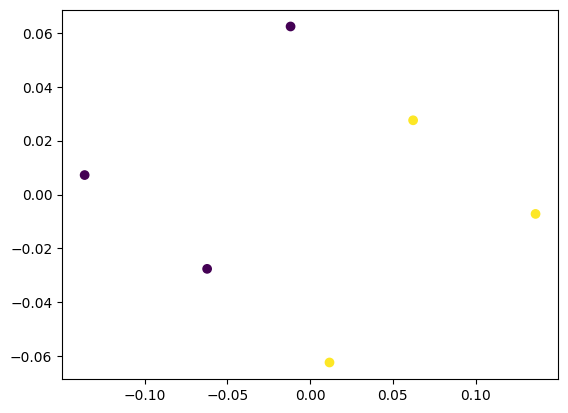

1644830000000.0


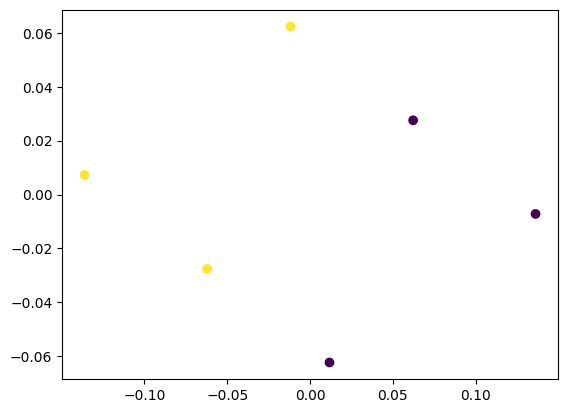

1644830000000.0


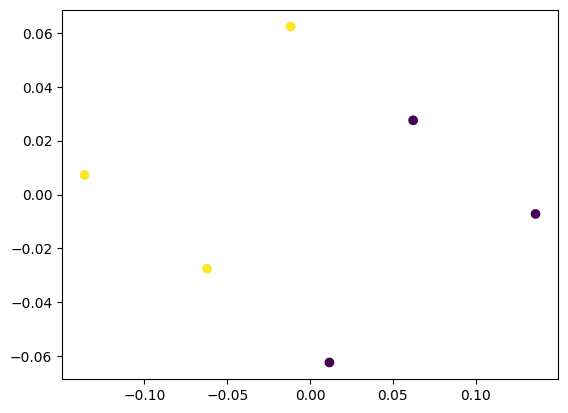

1644830000000.0


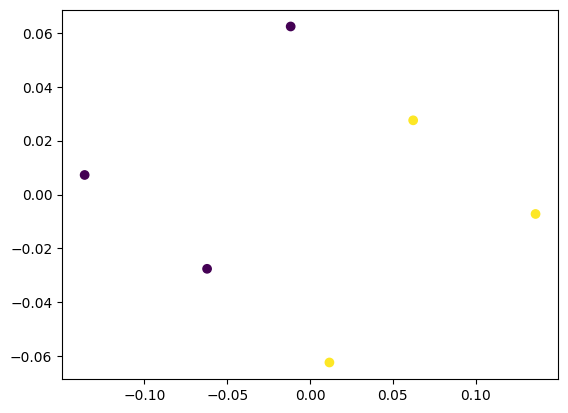

1644830000000.0


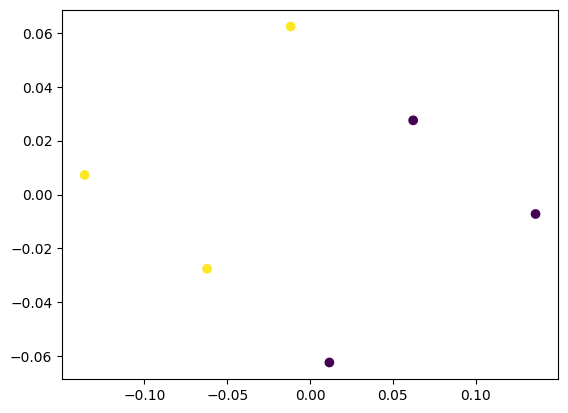

1644830000000.0


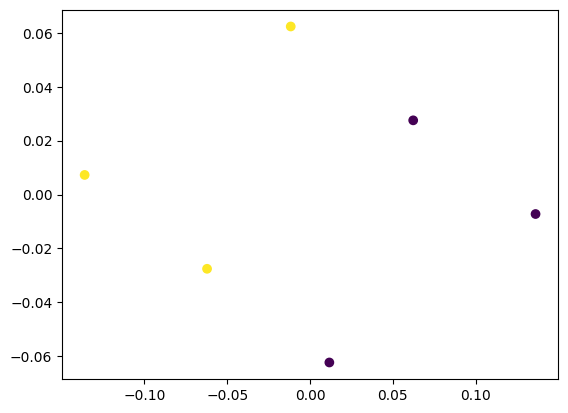

1644830000000.0


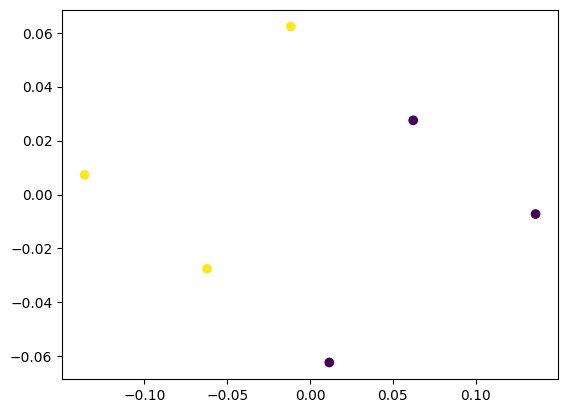

1644830000000.0


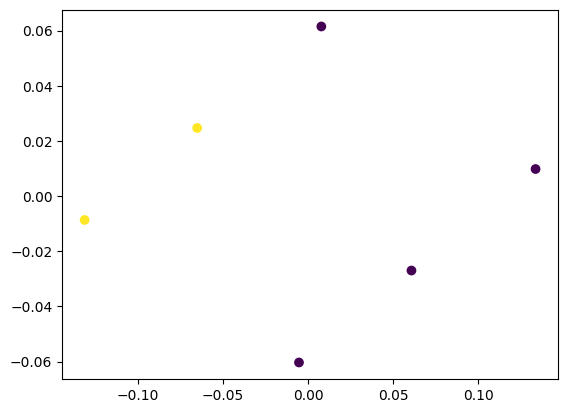

1644830000000.0


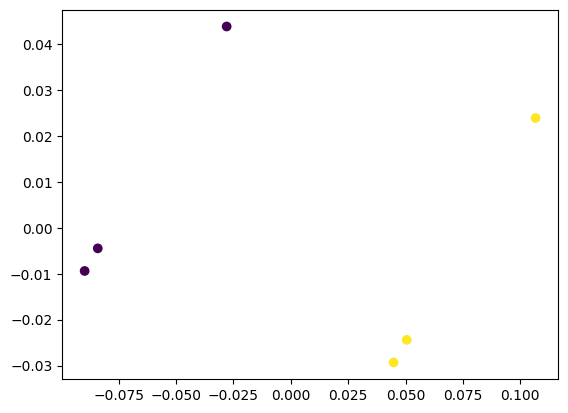

1644830000000.0


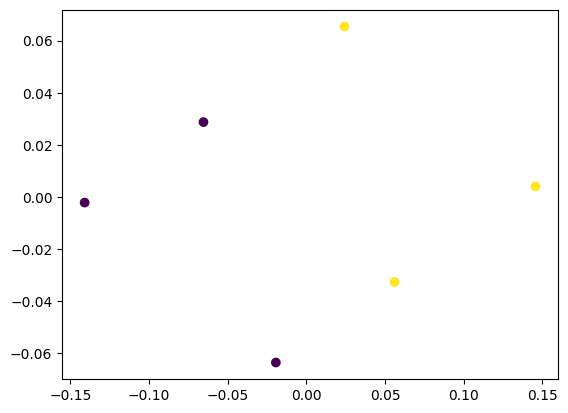

1644830000000.0


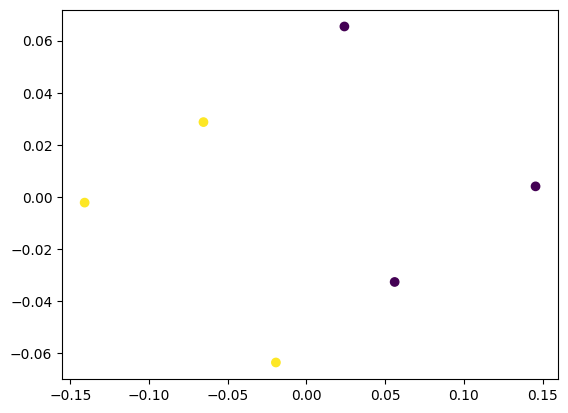

1644830000000.0


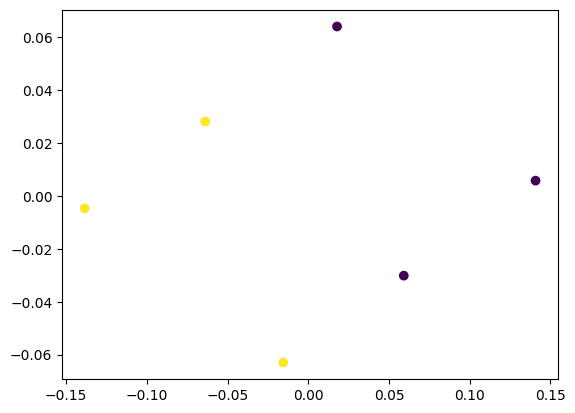

1644830000000.0


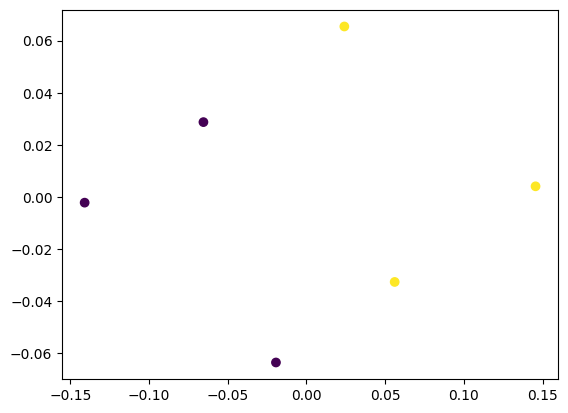

1644830000000.0


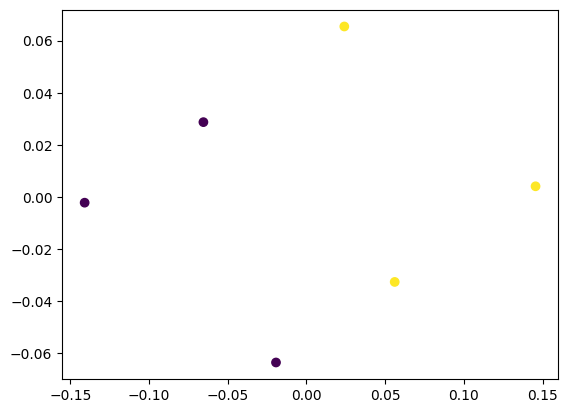

1644830000000.0


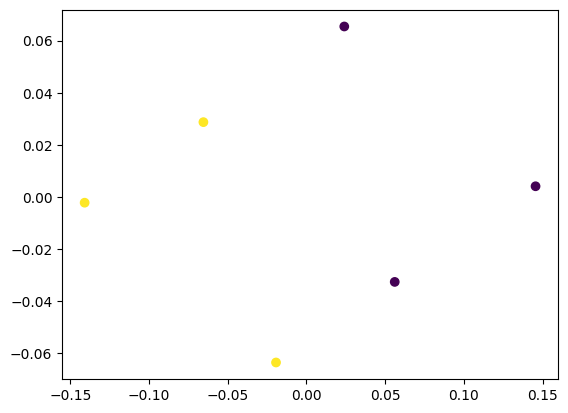

1644830000000.0


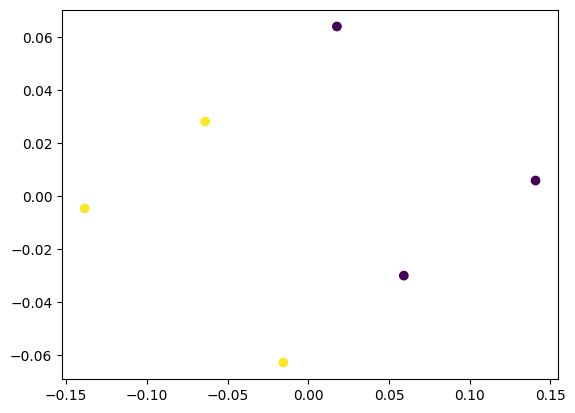

1644830000000.0


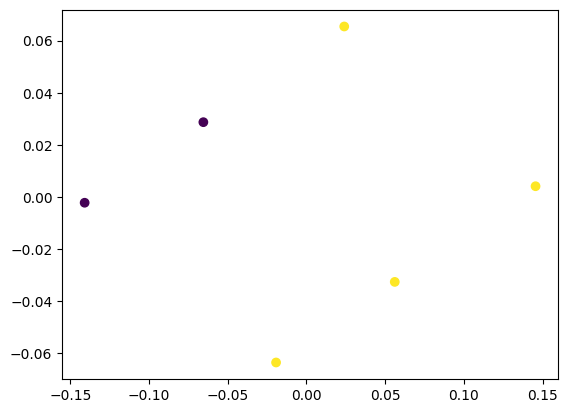

1644830000000.0


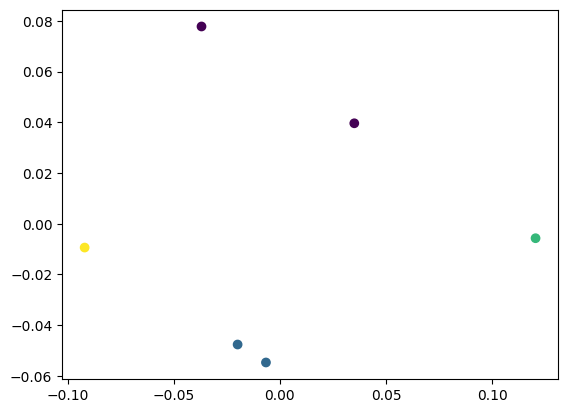

1644830000000.0


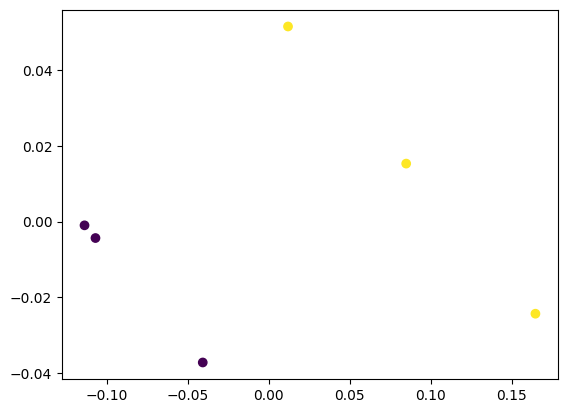

1644830000000.0


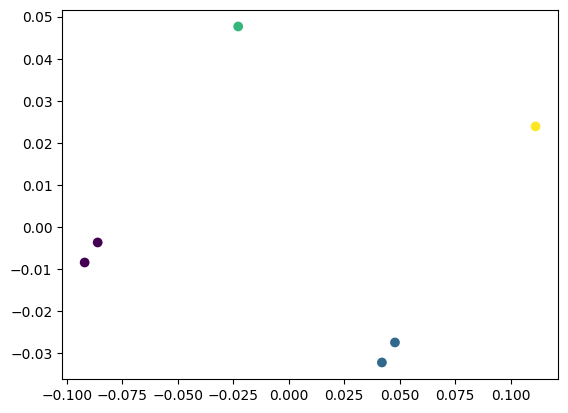

1644830000000.0


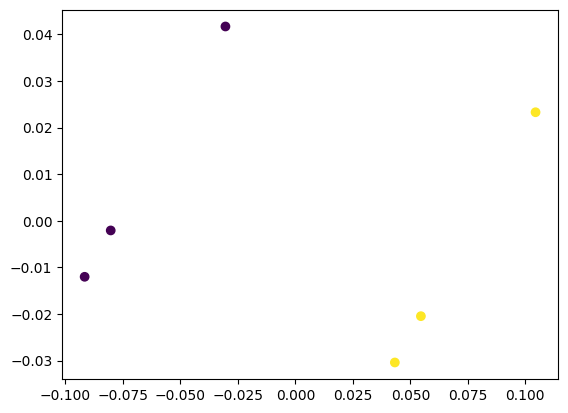

1644830000000.0


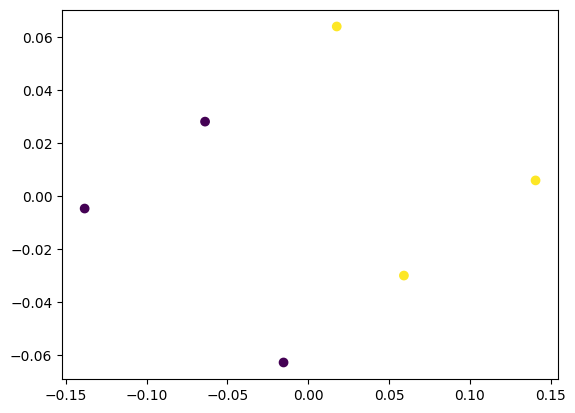

1644830000000.0


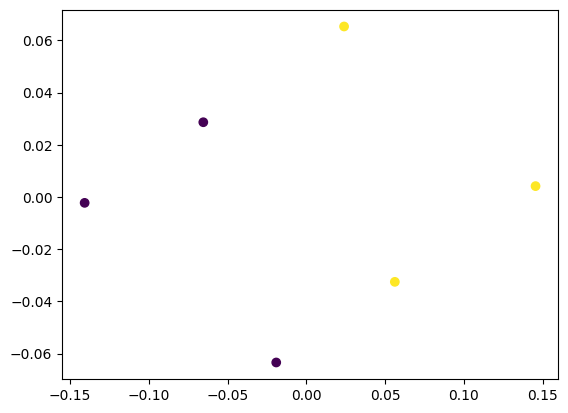

1644830000000.0


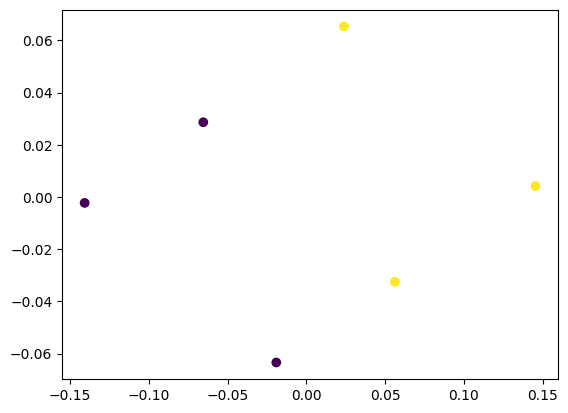

1644830000000.0


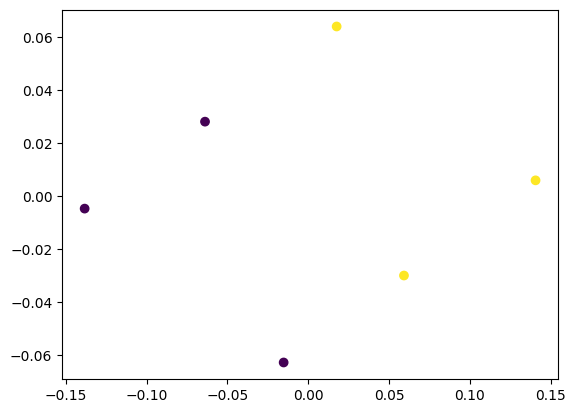

1644830000000.0


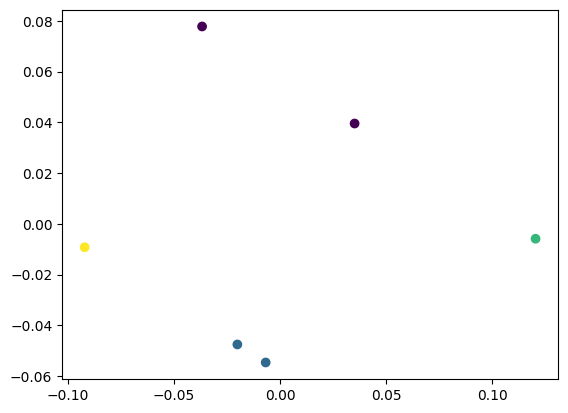

1644830000000.0


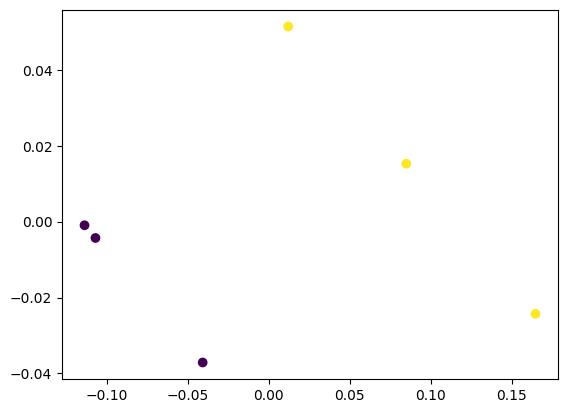

1644830000000.0


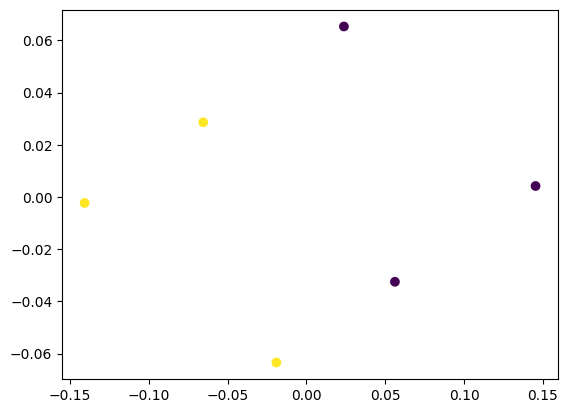

1644830000000.0


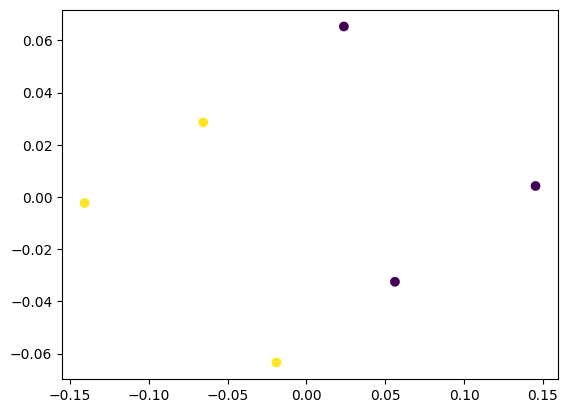

1644830000000.0


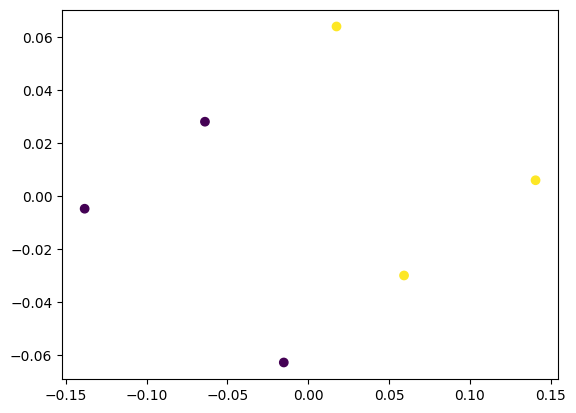

1644830000000.0


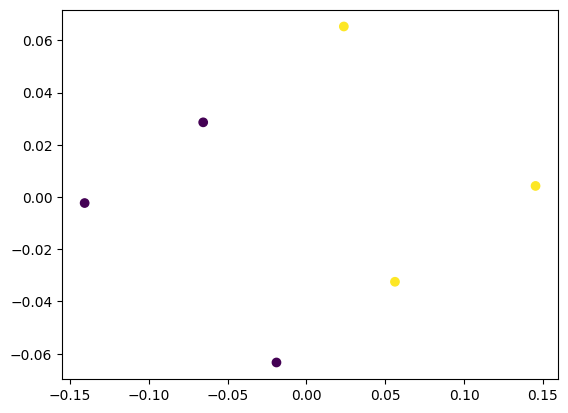

1644830000000.0


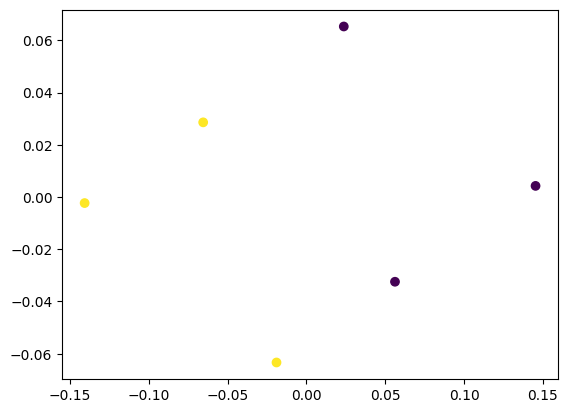

1644830000000.0


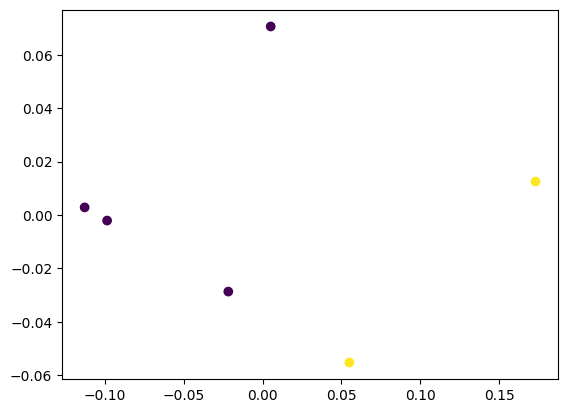

1644830000000.0


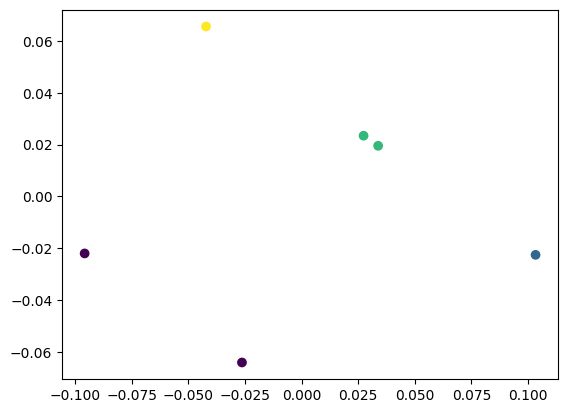

1644830000000.0


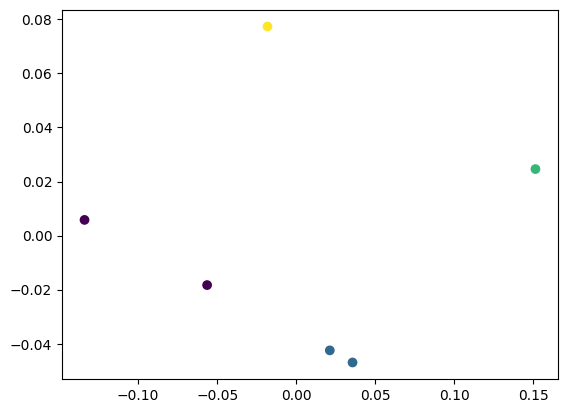

1644830000000.0


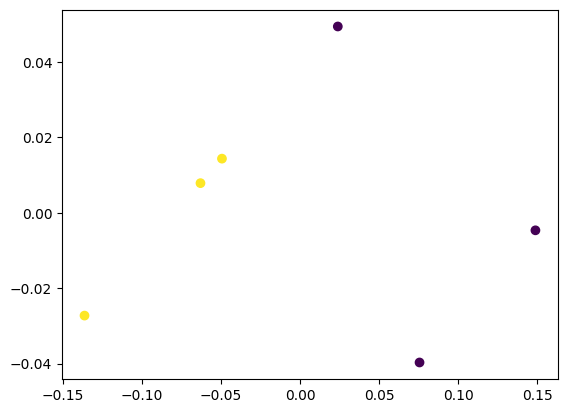

1644830000000.0


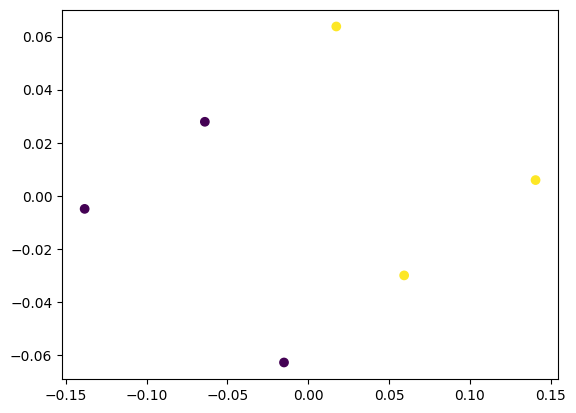

1644830000000.0


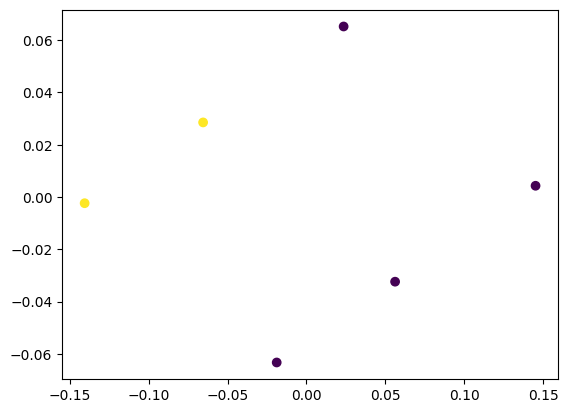

1644830000000.0


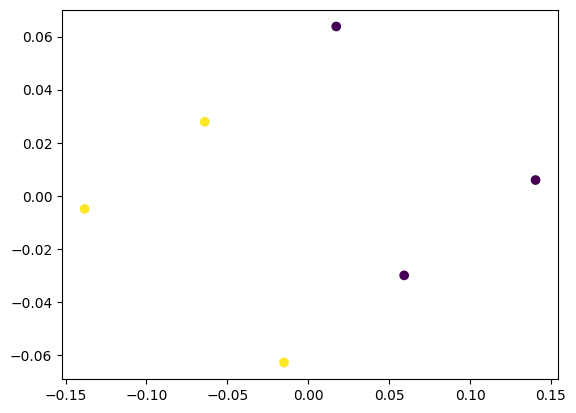

1644830000000.0


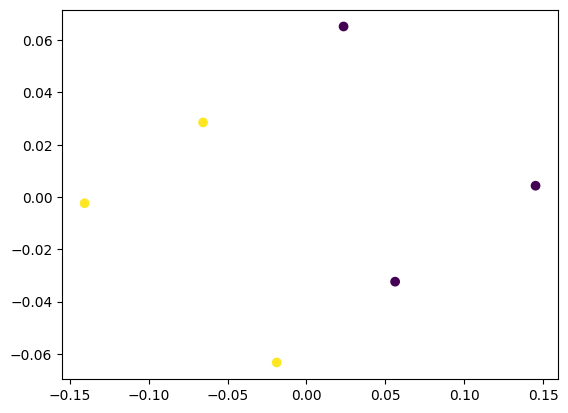

1644830000000.0


KeyboardInterrupt: 

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
#a tunable parameter as per the number of flights in the dataset
NO_OF_FLIGHTS = 6

#go through each timestamp and cluster the dataset for that timestamp
for i in range(0,len(df), NO_OF_FLIGHTS):
  m = []
  #do k-means for every possible cluster shape starting with 2 and  find its silhouette score
  for x in range(2,NO_OF_FLIGHTS):
    kmeans = KMeans(n_clusters=x, random_state=42)
    X = df[new_col][i:i+NO_OF_FLIGHTS]
    m.append(silhouette_score(X, kmeans.fit_predict(X)))

  #maximum possible silhouette score will be our number of clusters
  sil_score = m.index(max(m)) + 2
  kmeans = KMeans(n_clusters=sil_score)

  #doing pca to convert data into just two dimensions
  pca = PCA(2)
  d = pca.fit_transform(df[new_col][i:i+NO_OF_FLIGHTS])

  #predict the value and visualise
  label = kmeans.fit_predict(d)
  print(timestamp[i+2])
  plt.scatter(d[:,0] ,d[:,1],c = label)
  plt.show()

## Finding optimal number of clusters using Information-theoretic approach

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
class JumpsMethod():

    def __init__(self, data):
        self.data = data
        self.p = data.shape[1]

    def distortions(self, cluster_range=range(1, 20 + 1), random_state=0):
        # dummy vector for Distortions
        self.distortions = np.repeat(0, len(cluster_range) + 1).astype(np.float32)
        # for each k in cluster range implement
        for k in cluster_range:
            # initialize and fit the clusterer giving k in the loop
            km = KMeans(n_clusters=k, random_state=random_state)
            km.fit(self.data)
            # calculate centers of suggested k clusters
            centers = km.cluster_centers_
            # since we need to calculate the mean of mins create dummy vector
            for_mean = np.repeat(0, len(self.data)).astype(np.float32)
            # for each observation (i) in data implement
            for i, element in enumerate(np.array(self.data)[1:]):
                # dummy for vector of distances between i-th obs and k-center
                dists = np.repeat(0, k).astype(np.float32)
                # for each cluster in KMeans clusters implement
                for cluster in range(k):
                    # calculate the within cluster dispersion, i.e euclidean distance between each cluster and cluster centre
                    tmp = np.transpose(element - centers[cluster])
                    dists[cluster] = tmp.dot(tmp)
                # take the lowest distance, that will be the cluster of the data point
                for_mean[i] = min(dists)
            #calculate the mean of distortions
            self.distortions[k] = np.mean(for_mean) / self.p
        return self.distortions


    def jumps(self, y=None):
        #setting up Y = p/2 where p is the dimensionality of the dataset
        if y is None:
            self.y = self.p / 2
        else:
            self.y = y
        #finding distortion ^(-Y/2)
        self.jumps = [0] + [self.distortions[1] ** (-self.y) - 0]
        #calculating jump values
        self.jumps += [(self.distortions[k] ** (-self.y))- (self.distortions[k-1] ** (-self.y)) for k in range(2, len(self.distortions))]
        return self.jumps

    def number_clusters(self):
        #return the index of the maximum jump value
        return np.argmax(np.array(self.jumps))

Testing for the various timestamps and printing number of clusters

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i in range(0,len(df), NO_OF_FLIGHTS):
  jumps = JumpsMethod(df[new_col][i:i+NO_OF_FLIGHTS])
  jumps.distortions(cluster_range=range(1, NO_OF_FLIGHTS), random_state=0)
  jumps.jumps()
  print(jumps.number_clusters())


#algorithm works well with datasets with higher dimensionality and more values

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


KeyboardInterrupt: 